# Statistics and plots for iPALM images in ASCII format

In [2]:
from peak_stats.reader.read_peaks import Reader
from peak_stats.reader.peaks import Image
from peak_stats.statistics.single_img_stats import ImgStats, PeakPositions, GroupPeakStats

In [3]:
datafile = "data/ascii_files/Run1-647_c123_sum_X2_processed_jsa_IDL_ASCII_image7.txt"

In [4]:
reader = Reader(datafile)
image = Image(reader)
stats = ImgStats(image=image)

## Basic statistics for single iPALM image

In [6]:
stats.print_statistics(image=image)

Convex hull volume: 33292185.477251135
Group Count:  115
Peak Count:   1483
Average peaks per group   12.895652173913044
Average sigma X:  9.152259705196006 nm
Average sigma Y:  13.023146327283655 nm
Average sigma Z:  5.397415140616225 nm
Convex hull volume:   33292185.477251135
Average number of photons per peak:  9534.12137559002
Average number of photons per group peak: 146923.75652173912
Average sigma X per group peaks: 6.232244802608697 nm
Average sigma Y per group peaks: 6.549014719130437 nm
Average sigma Z per group peaks: 3.302540886956522 nm


## 3D plots

### 3D plots (peaks in 3D space and convex hull) 
* all peaks - all blinking voxels recorded by iPALM microscopy
* filtered peaks - blinking voxels filtered by sigma parameter (peak position uncertainty)
* group peaks - detected oligo probes (after peaks clustering and choosing a representat for each cluster)

Convex hull volume is shown in nm^3

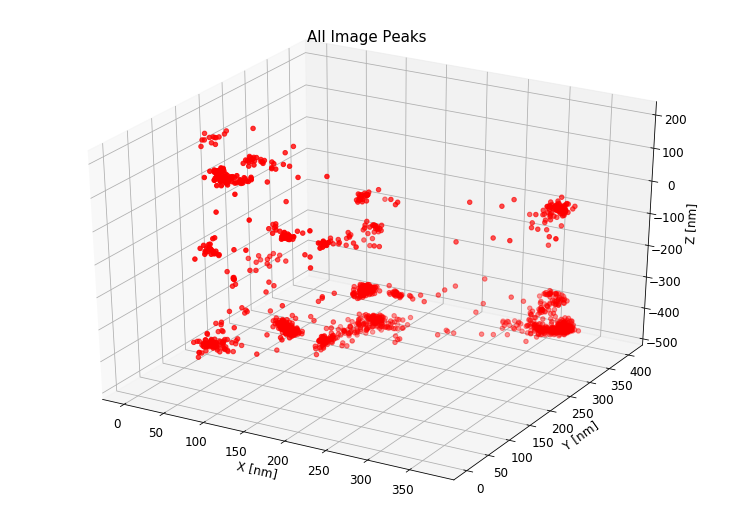

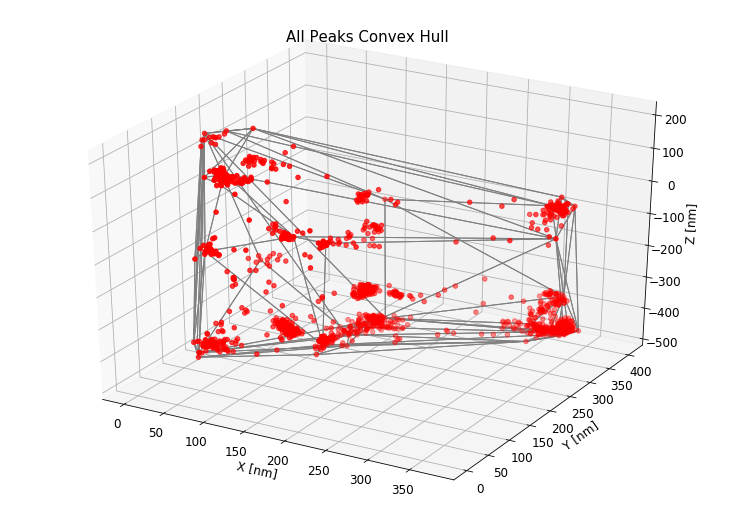

Convex hull volume: 33292185.477251146


In [8]:
# all peaks
peaks = PeakPositions(image=image, sigma_threshold=None, minimize=True)
peaks.plot_peak_positions(title="All Image Peaks", outpath=None)
peaks.plot_convex_hull(title="All Peaks Convex Hull", outpath=None)

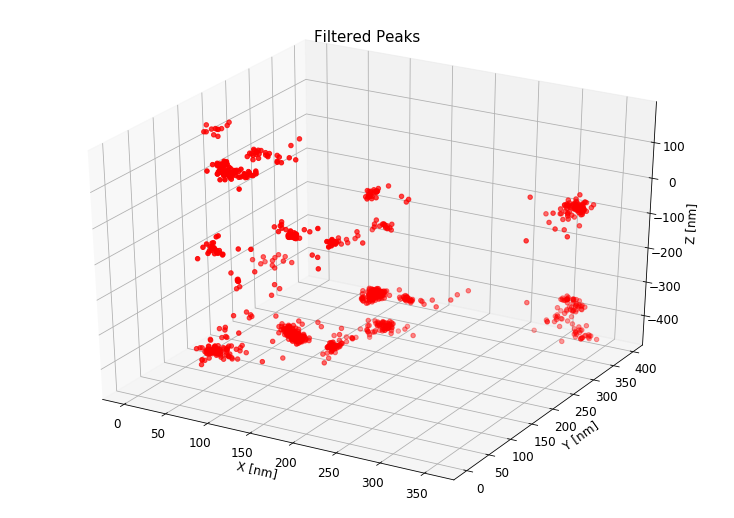

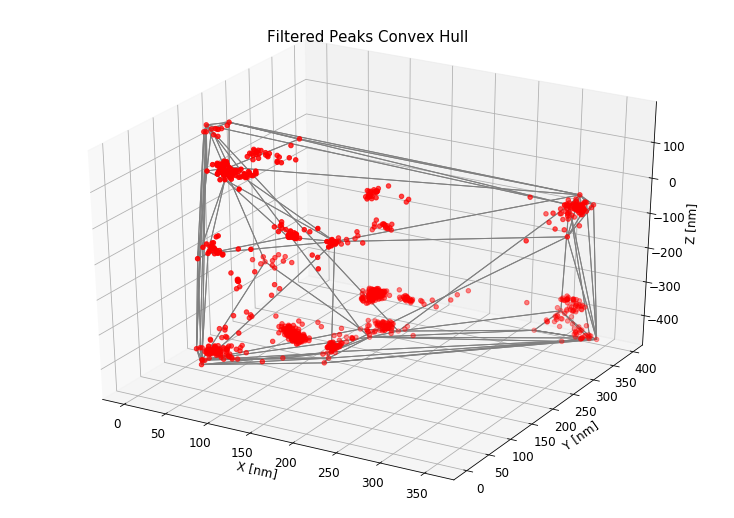

Convex hull volume: 25255320.305383567


In [9]:
# filtered peaks
filtered_peaks = PeakPositions(image=image, sigma_threshold=15, minimize=True)
filtered_peaks.plot_peak_positions(title="Filtered Peaks", outpath=None)
filtered_peaks.plot_convex_hull(title="Filtered Peaks Convex Hull", outpath=None)

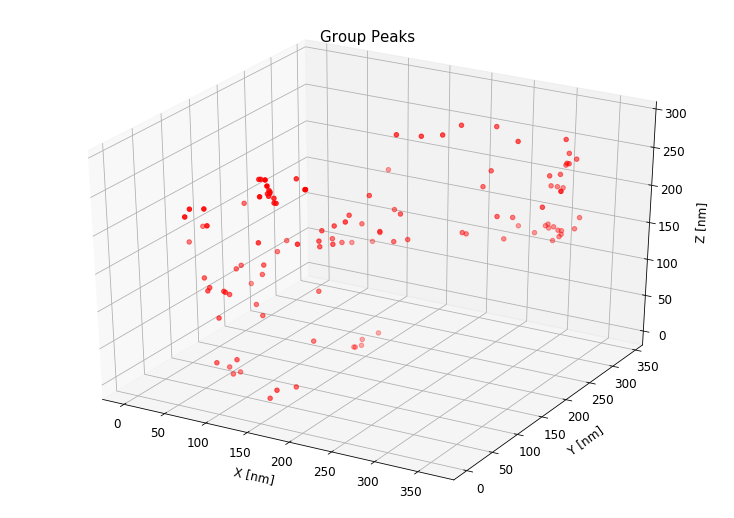

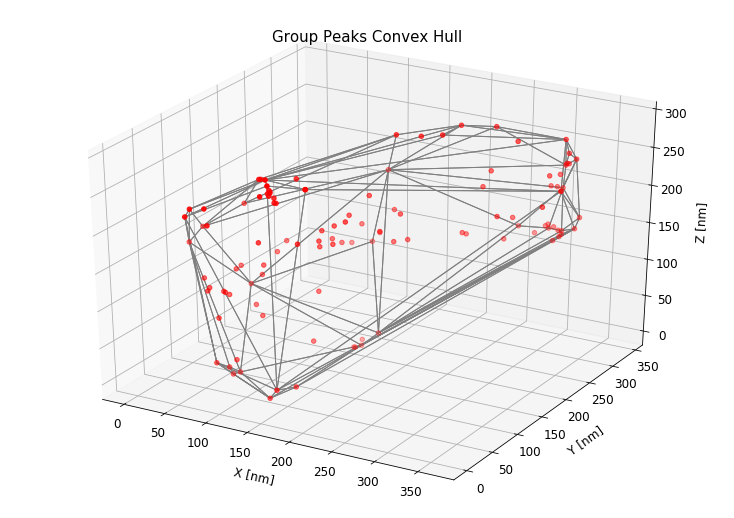

Convex hull volume: 11760913.401445776


In [10]:
# group peaks
group_peaks = GroupPeakStats(image=image)
group_peaks.plot_3d_group_peaks(title="Group Peaks", outpath=None)
group_peaks.plot_group_peaks_convex_hull(title="Group Peaks Convex Hull", outpath=None)

## Histograms
Here you can plot multiple histograms with different statistics for each image
For basic statistics see ```python histogram_options```

In [12]:
histogram_options = {"avg_group_sigma_x": stats.plot_sigma_x_hist, "avg_group_sigma_y": stats.plot_sigma_y_hist, 
                     "avg_group_sigma_z": stats.plot_sigma_z_hist, "avg_group_sigma": stats.plot_average_sigma,
                     "peaks_per_group": stats.plot_peaks_per_spot_histogram, "avg_photons_per_group": stats.plot_photons_per_group,
                    "avg_photons_per_peak": stats.plot_photons_per_peaks}

### Histograms of all peaks uncertainty (Average, X, Y and Z) 

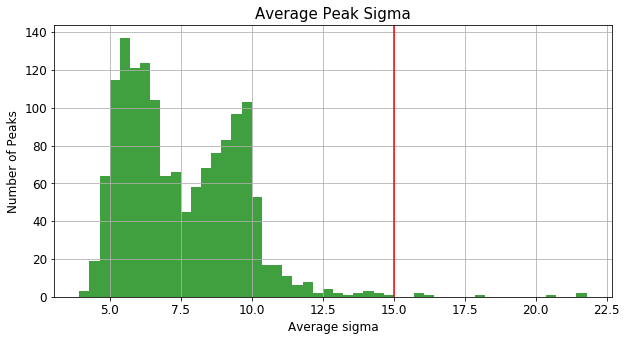

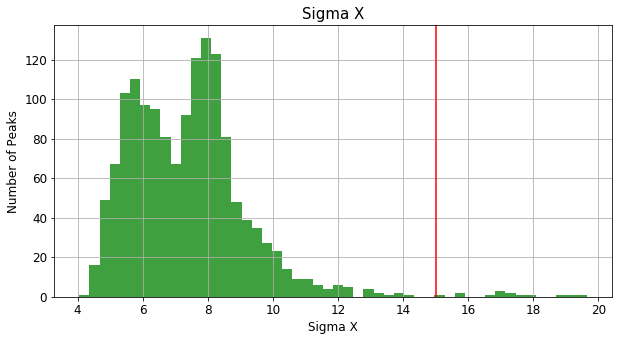

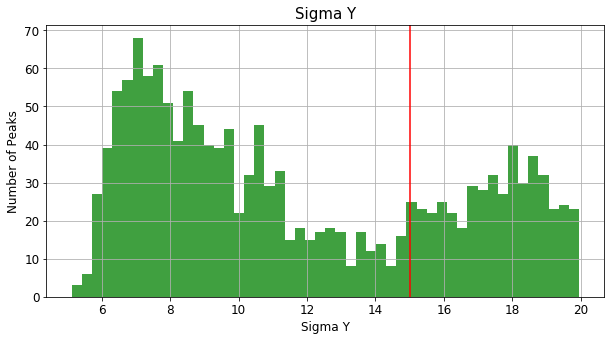

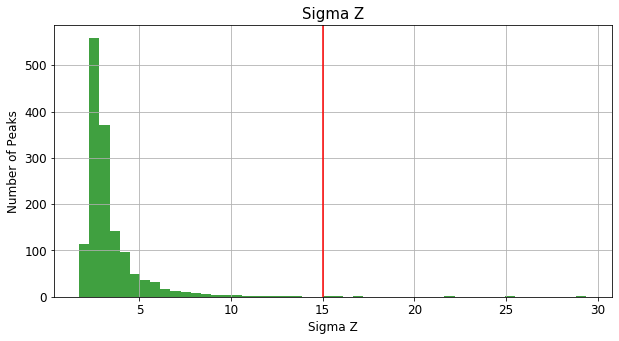

In [13]:
#---------------------Sigma in all peaks-----------------
stats.add_spots_sigma(image=image)
sigmas = ImgStats.add_peak_sigma(image)
stats.plot_average_peak_sigma(sigma_z=sigmas[2], sigma_x=sigmas[0], sigma_y=sigmas[1], save=False, outdir=None)
stats.plot_peak_sigma_x(x_sigma=sigmas[0],save=False, outdir=None)
stats.plot_peak_sigma_y_(y_sigma=sigmas[1], save=False, outdir=None)
stats.plot_peak_sigma_z(sigma_z=sigmas[2], save=False, outdir=None)

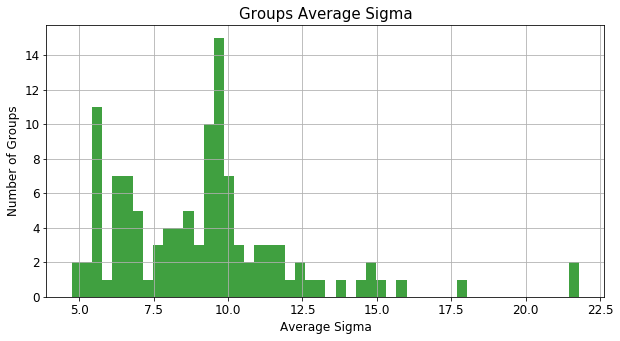

In [14]:
#------------plot given histogram----------------
histogram_options["avg_group_sigma"]()

## Few statistics for all images

In [18]:
#--------------------MULTIPLE IMAGE STATISTICS--------------------------
import glob
from peak_stats.statistics.multiple_img_stats import ImageDict

path = "data/ascii_files/*[0-9].txt"
file_list = glob.glob(path)
im_dict = ImageDict.create_from_files(inpath=file_list)
im_dict.print_stats()

Number of images: 25

Average number of photons per spot: 5380.913005694678
Average number of peaks per image: 2169.36
Average number of peaks per group: 16.964028776978417
Average number of groups per image: 127.88
